# single_snp_scale: Ludicrious-Speed GWAS 


##### Version 0.2.0

Carl Kadie & David Heckerman, December 19, 2019

### Introduction

As described in [Kadie & Heckerman, 2017](https://www.biorxiv.org/content/10.1101/154682v1), FaST-LMM's *single_snp_scale* function is a clusterable version of the FaST-LMM's
[single_snp](http://fastlmm.github.io.github.io/FaST-LMM/#single-snp) function.

The *single_snp_scale* function supports GWAS analysis on up to 1,000,000 individuals. It also runs fine on a single computer. This is useful for testing and for some runs a bit too  big for *single_snp*.

### Comparing *single_snp* to *single_snp_scale*

This table summarizes the differences between *single_snp* to *single_snp_scale*.


| single_snp                 | single_snp_scale              |
|----------------------------|-------------------------------|
| runs on 1 machine          | runs on cluster or 1 machine  |
| less overhead              | more overhead                 |
| scales to ~10K individuals | scales to ~1M individuals     |
| full or low_rank           | low rank only                 |
| uses only main memory  | uses main memory and SSD      |
| 0,1,2 kernels          | 1 kernel                      |
| SNP kernel or explicit | SNP kernel                    |
| caches some work       | caches all work               |
| defaults to cross validate over chromosomes | always cross validates over chromosomes |
| REML                   | REML                          |
| 1 phenotype at a time  |   1 phenotype at a time       |

Within these constraints, both functions produce the same answers.

The *single_snp_scale* function can run on any cluster, but such runs require these modules:
* a [runner](http://fastlmm.github.io.github.io/PySnpTools/#module-pysnptools.util.mapreduce1) : tells how to programmatically run batch jobs on the cluster of interest
* a [file_cache](http://fastlmm.github.io.github.io/PySnpTools/#module-pysnptools.util.filecache) : tells how to programmatically upload and download files to the nodes of the cluster.

Finally, as described in [Kadie & Heckerman, 2017](https://www.biorxiv.org/content/10.1101/154682v1), the *single_snp_scale* functions requires multiple cluster runs are needed to find number of SNPs needed to measure the similarity between individuals.

### Documentation

Find all the inputs and options for *single_snp_scale* described in its
[API Documentation](http://fastlmm.github.io.github.io/FaST-LMM/#single-snp-scale).

See [FaST-LMM's README.md](https://github.com/fastlmm/FaST-LMM/blob/master/README.md) for installation instructions, more documentation, code, and a bibliography.

### Contacts

* Email the developers at fastlmm-dev@python.org.
* [Join](mailto:fastlmm-user-join@python.org?subject=Subscribe) the user discussion and announcement list (or use [web sign up](https://mail.python.org/mailman3/lists/fastlmm-user.python.org)).
* [Open an issue](https://github.com/fastlmm/FaST-LMM/issues) on GitHub.

#### Notebook preparation and general use

To prepare this notebook to run analyses, please run the following script.

In [1]:
#Import these for Python2 & Python 3 support
from __future__ import absolute_import
from __future__ import print_function

# set some ipython notebook properties
%matplotlib inline

# set degree of verbosity (adapt to INFO for more verbose output)
import logging
logging.basicConfig(level=logging.WARNING)

# set figure sizes
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

# set display width for pandas data frames
import pandas as pd
pd.set_option('display.width', 1000)

To introduce *single_snp_scale*, let's first run it on the *single_snp* example from the [FaST-LMM notebook](https://nbviewer.jupyter.org/github/fastlmm.github.io/FaST-LMM/blob/master/doc/ipynb/FaST-LMM.ipynb). On a 6-processor consumer PC, the run takes about 1.5 minutes.

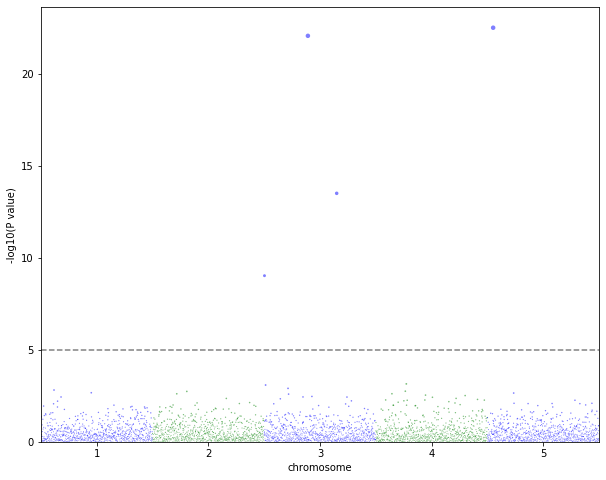

lambda=1.0078
Wall time: 1min 22s


,sid_index,SNP,Chr,GenDist,ChrPos,PValue,SnpWeight,SnpWeightSE,SnpFractVarExpl,Mixing,Nullh2
0,52,snp495_m0_.01m1_.04,5,4052,4052,2.990684e-23,0.418653,0.040052,0.424521,0.0,0.451117
1,392,snp1422_m0_.49m1_.5,3,2392,2392,8.251922e-23,-0.416495,0.040300,0.420587,0.0,0.279710
2,650,snp1200_m0_.37m1_.36,3,2650,2650,3.048007e-14,0.328870,0.042021,0.331240,0.0,0.279710
3,3,snp433_m0_.14m1_.11,3,2003,2003,9.202499e-10,-0.268289,0.042973,0.269670,0.0,0.279710
4,274,snp2832_m0_.46m1_.1,4,3274,3274,7.069762e-04,0.170421,0.050003,0.151124,0.0,0.542046
5,13,snp1413_m0_.04m1_.03,3,2013,2013,8.161238e-04,-0.148719,0.044157,0.149377,0.0,0.279710
6,214,snp2804_m0_.16m1_.3,3,2214,2214,1.239806e-03,0.150705,0.046396,0.144180,0.0,0.279710
7,117,snp751_m0_.04m1_.25,1,117,117,1.527432e-03,-0.152430,0.047827,0.141523,0.0,0.614963
8,265,snp1440_m0_.35m1_.32,4,3265,3265,1.771049e-03,0.136281,0.043358,0.139610,0.0,0.542046
9,307,snp2162_m0_.61m1_.42,2,1307,1307,1.816577e-03,-0.143296,0.045700,0.139280,0.0,0.534263


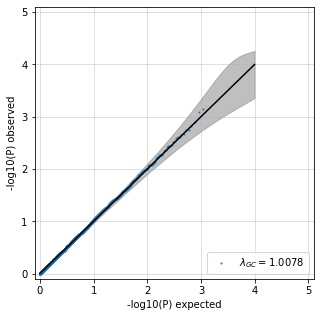

In [15]:
%%time
from fastlmm.association import single_snp_scale

bed_fn = "../../tests/datasets/synth/all"
pheno_fn = "../../tests/datasets/synth/pheno_10_causals.txt"
cov_fn = "../../tests/datasets/synth/cov.txt"

results_df = single_snp_scale(bed_fn, pheno_fn, covar=cov_fn, count_A1=False)

# manhattan plot
import pylab
import fastlmm.util.util as flutil
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
flutil.manhattan_plot(results_df[["Chr", "ChrPos", "PValue"]].values,pvalue_line=1e-5,xaxis_unit_bp=False)
pylab.show()

# qq plot
from fastlmm.util.stats import plotp
plotp.qqplot(results_df["PValue"].values, xlim=[0,5], ylim=[0,5])

# print head of results data frame
import pandas as pd
pd.set_option('display.width', 1000)
results_df.head(n=10)

Notice that *single_snp_scale* here has the same inputs as *single_snp* and produces the same output (to many decimal places). On a small example like this, *single_snp_scale* is slower than *single_snp* (3 minutes vs. 3 seconds) because of the overhead of dividing the work for clustering. On examples that take several hours, their run time is comparable. And, of course, *single_snp_scale* can complete larger jobs that *single_snp* cannot.

## Caching Results

The *single_snp_scale* function can cache its work. If it is interrupted, it can be restarted just by re-running. It will pick up where it left off.

> *Aside*: If no cache is explicitly specified, *single_snp_scale* will use an automatically erasing, temporary directory.
> If the TEMP environment variable is set, Python places this temporary directory under it. On the other hand, if a cache is
> specified, *single_snp_scale* will *not* automatically erase it; instead, you'll have to decide when to erase it.

In [4]:
# Set to a folder on your machine, ideally an SSD drive. (Best is a fast M.2. SSD.)
cache_top = r'm:\deldir'

In [16]:
%%time
# The first run again, now with an explicit cache, takes about 1.5 minutes.
# assumes that folder "cache_top+'/small'" doesn't yet exist
results_df = single_snp_scale(bed_fn, pheno_fn, covar=cov_fn, count_A1=False, cache=cache_top+'/small')
results_df.head(n=10)

Wall time: 1min 22s


,sid_index,SNP,Chr,GenDist,ChrPos,PValue,SnpWeight,SnpWeightSE,SnpFractVarExpl,Mixing,Nullh2
0,52,snp495_m0_.01m1_.04,5,4052,4052,2.990684e-23,0.418653,0.040052,0.424521,0.0,0.451117
1,392,snp1422_m0_.49m1_.5,3,2392,2392,8.251922e-23,-0.416495,0.040300,0.420587,0.0,0.279710
2,650,snp1200_m0_.37m1_.36,3,2650,2650,3.048007e-14,0.328870,0.042021,0.331240,0.0,0.279710
3,3,snp433_m0_.14m1_.11,3,2003,2003,9.202499e-10,-0.268289,0.042973,0.269670,0.0,0.279710
4,274,snp2832_m0_.46m1_.1,4,3274,3274,7.069762e-04,0.170421,0.050003,0.151124,0.0,0.542046
5,13,snp1413_m0_.04m1_.03,3,2013,2013,8.161238e-04,-0.148719,0.044157,0.149377,0.0,0.279710
6,214,snp2804_m0_.16m1_.3,3,2214,2214,1.239806e-03,0.150705,0.046396,0.144180,0.0,0.279710
7,117,snp751_m0_.04m1_.25,1,117,117,1.527432e-03,-0.152430,0.047827,0.141523,0.0,0.614963
8,265,snp1440_m0_.35m1_.32,4,3265,3265,1.771049e-03,0.136281,0.043358,0.139610,0.0,0.542046
9,307,snp2162_m0_.61m1_.42,2,1307,1307,1.816577e-03,-0.143296,0.045700,0.139280,0.0,0.534263


In [6]:
# A second run uses the cache and returns instantly.
results_df = single_snp_scale(bed_fn, pheno_fn, covar=cov_fn, count_A1=False, cache=cache_top+'/small')
results_df.head(n=10)

,sid_index,SNP,Chr,GenDist,ChrPos,PValue,SnpWeight,SnpWeightSE,SnpFractVarExpl,Mixing,Nullh2
0,52,snp495_m0_.01m1_.04,5,4052,4052,2.990684e-23,0.418653,0.040052,0.424521,0.0,0.451117
1,392,snp1422_m0_.49m1_.5,3,2392,2392,8.251918e-23,-0.416495,0.040300,0.420587,0.0,0.279711
2,650,snp1200_m0_.37m1_.36,3,2650,2650,3.048007e-14,0.328870,0.042021,0.331240,0.0,0.279711
3,3,snp433_m0_.14m1_.11,3,2003,2003,9.202498e-10,-0.268289,0.042973,0.269670,0.0,0.279711
4,274,snp2832_m0_.46m1_.1,4,3274,3274,7.069762e-04,0.170421,0.050003,0.151124,0.0,0.542046
5,13,snp1413_m0_.04m1_.03,3,2013,2013,8.161238e-04,-0.148719,0.044157,0.149377,0.0,0.279711
6,214,snp2804_m0_.16m1_.3,3,2214,2214,1.239807e-03,0.150705,0.046396,0.144180,0.0,0.279711
7,117,snp751_m0_.04m1_.25,1,117,117,1.527432e-03,-0.152430,0.047827,0.141523,0.0,0.614963
8,265,snp1440_m0_.35m1_.32,4,3265,3265,1.771049e-03,0.136281,0.043358,0.139610,0.0,0.542046
9,307,snp2162_m0_.61m1_.42,2,1307,1307,1.816576e-03,-0.143296,0.045700,0.139280,0.0,0.534262


## Running on Multiple Processors (or a Cluster)

To run on a cluster, we specify must 'runner', a module object that tells how to submit and run batches of work. Currently, the only provided runners are 'Local' (the default) and 'LocalMultiProc' (run as multiple Python processes). In the past we've implemented runners for Hadoop, Windows HPC, and Azure Batch. New runners can be created for almost any batch-like cluster.

Here is an example of running the small job on five additional Python processes:

In [17]:
%%time
from pysnptools.util.mapreduce1.runner import LocalMultiProc
# assumes that folder "cache_top+'/small5proc'" doesn't yet exist

runner = LocalMultiProc(taskcount=5) #Run on 5 additional Python processes

results_df = single_snp_scale(bed_fn, pheno_fn, covar=cov_fn, count_A1=False, cache=cache_top+'/small5proc', runner=runner)
results_df.head(n=10)

Wall time: 1min 41s


,sid_index,SNP,Chr,GenDist,ChrPos,PValue,SnpWeight,SnpWeightSE,SnpFractVarExpl,Mixing,Nullh2
0,52,snp495_m0_.01m1_.04,5,4052,4052,2.990684e-23,0.418653,0.040052,0.424521,0.0,0.451117
1,392,snp1422_m0_.49m1_.5,3,2392,2392,8.251922e-23,-0.416495,0.040300,0.420587,0.0,0.279710
2,650,snp1200_m0_.37m1_.36,3,2650,2650,3.048007e-14,0.328870,0.042021,0.331240,0.0,0.279710
3,3,snp433_m0_.14m1_.11,3,2003,2003,9.202499e-10,-0.268289,0.042973,0.269670,0.0,0.279710
4,274,snp2832_m0_.46m1_.1,4,3274,3274,7.069762e-04,0.170421,0.050003,0.151124,0.0,0.542046
5,13,snp1413_m0_.04m1_.03,3,2013,2013,8.161238e-04,-0.148719,0.044157,0.149377,0.0,0.279710
6,214,snp2804_m0_.16m1_.3,3,2214,2214,1.239806e-03,0.150705,0.046396,0.144180,0.0,0.279710
7,117,snp751_m0_.04m1_.25,1,117,117,1.527432e-03,-0.152430,0.047827,0.141523,0.0,0.614963
8,265,snp1440_m0_.35m1_.32,4,3265,3265,1.771049e-03,0.136281,0.043358,0.139610,0.0,0.542046
9,307,snp2162_m0_.61m1_.42,2,1307,1307,1.816577e-03,-0.143296,0.045700,0.139280,0.0,0.534263


For more on using runners, see the [PySnpTools MapReduce1 API documentation](http://fastlmm.github.io.github.io/PySnpTools/#module-pysnptools.util.mapreduce1). 
For information on implementing for a new runner, see the [corresponding source code](https://github.com/fastlmm.github.io/PySnpTools/tree/master/pysnptools/util).
The [single_snp_scale API Documentation](http://fastlmm.github.io.github.io/FaST-LMM/#single-snp-scale) also includes information on how to specify different runners for different phases of the calculations.

## Distributing Files

Consider a run for 1 million individuals and 1 million SNPs on a cluster with 100 nodes. As part of the run, every node in the cluster will  access every byte in a 400GB file about 10,000 times. The nodes also must access pieces of a 2.5TB file.

The naive way to access files on Linux is to just mount them via [FUSE](https://en.wikipedia.org/wiki/Filesystem_in_Userspace). But as Linus Torvalds warns:

> "Userspace filesystem \[e.g. FUSE\]? The problem is right there. Always has been.
> People who think that userspace filesystems are realistic for anything but toys are just misguided."
[https://lkml.org/lkml/2011/6/9/462](https://lkml.org/lkml/2011/6/9/462)

So perhaps we should use a different method. We can make everything 10,000 times faster by downloading the 400GB file once to an SSD drive on each node. How should we do these 100 copies? Again, using FUSE would be simplest way, but many clusters offer file-copy methods orders of magnitude faster.

In any case, the *single_snp_scale* function can work with *any* method of distributing files. It just requires a [file_cache module](http://fastlmm.github.io.github.io/PySnpTools/#module-pysnptools.util.filecache) describing the method of choice.

> _Aside_: For the run described in the [paper](https://www.biorxiv.org/content/10.1101/154682v1), 
> we used 'AzureP2P', a *file_cache* method that stored one copy of every file in
> Azure blog storage. After copying once from blog storage, the module then distributes additional copies via a peer-to-peer
> tree copy over the cluster's fast local network.

If no  distribution method is given to *single_snp_scale*, it assumes all files are local. To specify a different distribution method give it:
* A *file_cache* cache directory
* SNPs data accessed via a *file_cache*

Here is an example. We create a *PeerToPeer* file_cache that gives every process on the machine a private bit of local storage. Then we upload the SNP data into that file_cache run our small sample problem.

In [7]:
#Change the line 'return ip_pid, r'c:/deldir/peertopeer1/{0}'.format(ip_pid)'
# to point to your SSD drive
# See the "if desired" comment below on how to clear the file_cache

from pysnptools.util.filecache import PeerToPeer
from pysnptools.snpreader import Bed, DistributedBed
from pysnptools.util.mapreduce1.runner import LocalMultiProc
from fastlmm.association import single_snp_scale

bed_fn = "../../tests/datasets/synth/all"
pheno_fn = "../../tests/datasets/synth/pheno_10_causals.txt"
cov_fn = "../../tests/datasets/synth/cov.txt"

#Every Python process will get private local storage based its process id (and this computer's ipaddress)
#A directory in "common" tracks the locations of each file. Copying is peer-to-peer.
def id_and_path_function():
     from pysnptools.util.filecache import ip_address_pid
     ip_pid = ip_address_pid()
     #Need to put the 'cache_top' here explicitly.
     return ip_pid, r'm:/deldir/peertopeer1/{0}'.format(ip_pid)
file_cache = PeerToPeer(common_directory=cache_top+'/peertopeer1/common',id_and_path_function=id_and_path_function)

# If desired, clear the file_cache
#file_cache.rmtree()

# The test SNPs (and G0, if given) must be accessible from every node, so we upload them into
# a DistributedBed. (There will be 2 Bed files per chrom.)
test_snps_cache = file_cache.join('test_snps')
if not next(test_snps_cache.walk(),None): #If no files in the test_snps folder, upload data (takes a few seconds)
    test_snps = DistributedBed.write(test_snps_cache, Bed(bed_fn,count_A1=False), piece_per_chrom_count=2)
else:
    test_snps = DistributedBed(test_snps_cache)

runner = LocalMultiProc(taskcount=5) #Run on 5 additional Python processes

# We set cache=file_cache so that intermetiate files will be accessible from every node.
# We use give the DistributedBed as the source of SNP data.
results_df = single_snp_scale(test_snps, pheno_fn, covar=cov_fn, count_A1=False, cache=file_cache, runner=runner)
results_df.head(n=10)

,sid_index,SNP,Chr,GenDist,ChrPos,PValue,SnpWeight,SnpWeightSE,SnpFractVarExpl,Mixing,Nullh2
0,52,snp495_m0_.01m1_.04,5,4052,4052,2.990684e-23,0.418653,0.040052,0.424521,0.0,0.451117
1,392,snp1422_m0_.49m1_.5,3,2392,2392,8.251922e-23,-0.416495,0.040300,0.420587,0.0,0.279710
2,650,snp1200_m0_.37m1_.36,3,2650,2650,3.048007e-14,0.328870,0.042021,0.331240,0.0,0.279710
3,3,snp433_m0_.14m1_.11,3,2003,2003,9.202499e-10,-0.268289,0.042973,0.269670,0.0,0.279710
4,274,snp2832_m0_.46m1_.1,4,3274,3274,7.069762e-04,0.170421,0.050003,0.151124,0.0,0.542046
5,13,snp1413_m0_.04m1_.03,3,2013,2013,8.161238e-04,-0.148719,0.044157,0.149377,0.0,0.279710
6,214,snp2804_m0_.16m1_.3,3,2214,2214,1.239806e-03,0.150705,0.046396,0.144180,0.0,0.279710
7,117,snp751_m0_.04m1_.25,1,117,117,1.527432e-03,-0.152430,0.047827,0.141523,0.0,0.614963
8,265,snp1440_m0_.35m1_.32,4,3265,3265,1.771049e-03,0.136281,0.043358,0.139610,0.0,0.542046
9,307,snp2162_m0_.61m1_.42,2,1307,1307,1.816576e-03,-0.143296,0.045700,0.139280,0.0,0.534262


### Larger Example

Let's end this notebook with an example that is too big to run on *single_snp*, but that runs (in about 16 hours) on one machine via *single_snp_scale*. It requires an SSD drive with 1/2 TB free.

In [8]:
# Set to a folder on your machine, ideally an SSD drive. My 'm:' drive is a fast M.2. SSD.
cache_top = r'm:\deldir'

Generate random SNPs, pheno, and covar data, if needed. (Can take 6 hours)

In [8]:
from pysnptools.util.filecache import LocalCache
file_cache_top = LocalCache(cache_top)

seed = 1
iid_count = 250*1000 # number of individuals
sid_count = 10*1000 # number of SNPs
chrom_count = 10
piece_per_chrom_count = 25 #Number of pieces for each chromosome, e.g. 100
test_snps_cache = file_cache_top.join('testsnps_{0}_{1}_{2}_{3}'.format(seed,chrom_count,iid_count,sid_count))

if not next(test_snps_cache.walk(),None): #If no files in the test_snps folder, generate data (takes about 6 hours)
    from pysnptools.snpreader import SnpGen
    from pysnptools.util.mapreduce1.runner import LocalMultiProc
    
    snpgen = SnpGen(seed=seed,iid_count=iid_count,sid_count=sid_count,chrom_count=chrom_count) #Create an on-the-fly SNP generator
    snp_gen_runner = LocalMultiProc(5)
    #Write random SNP data to a DistributedBed
    test_snps = DistributedBed.write(test_snps_cache,snpgen,piece_per_chrom_count=piece_per_chrom_count,runner=snp_gen_runner)
else:
    test_snps = DistributedBed(test_snps_cache)

#Generate random pheno and covar
import numpy as np
from pysnptools.snpreader import SnpData
np.random.seed(seed)
pheno = SnpData(iid=test_snps.iid,sid=['pheno'],val=np.random.randn(test_snps.iid_count,1)*3+2)
covar = SnpData(iid=test_snps.iid,sid=['covar1','covar2'],val=np.random.randn(test_snps.iid_count,2)*2-3)

test_snps.shape

(250000, 10000)

Do the run. (Takes about 8.5 hours)

In [13]:
%%time
from fastlmm.association import single_snp_scale
from pysnptools.util.mapreduce1.runner import LocalMultiProc

sss_cache = file_cache_top.join('bigger')
sss_runner = LocalMultiProc(5)

results_df = single_snp_scale(test_snps, pheno, G0=test_snps, covar=covar, cache=sss_cache, runner=sss_runner)
results_df.head(n=10)

Wall time: 8h 11min 12s


,sid_index,SNP,Chr,GenDist,ChrPos,PValue,SnpWeight,SnpWeightSE,SnpFractVarExpl,Mixing,Nullh2
0,556,sid_5408,5.0,0.0,1.042141e+09,0.000050,0.027517,0.006787,0.008108,0.0,0.000000
1,706,sid_4504,4.0,0.0,8.680462e+08,0.000059,-0.027252,0.006782,0.008037,0.0,0.000000
2,543,sid_3231,3.0,0.0,6.226361e+08,0.000065,0.027075,0.006779,0.007988,0.0,0.000174
3,576,sid_6434,6.0,0.0,1.239995e+09,0.000279,0.024655,0.006785,0.007268,0.0,0.000000
4,474,sid_4272,4.0,0.0,8.233398e+08,0.000280,0.024639,0.006782,0.007266,0.0,0.000000
5,250,sid_6108,6.0,0.0,1.177175e+09,0.000488,0.023634,0.006778,0.006974,0.0,0.000000
6,770,sid_8465,8.0,0.0,1.631379e+09,0.000587,-0.023333,0.006788,0.006875,0.0,0.000000
7,902,sid_4700,4.0,0.0,9.058154e+08,0.000788,-0.022751,0.006777,0.006714,0.0,0.000000
8,795,sid_3483,3.0,0.0,6.711965e+08,0.000801,0.022723,0.006778,0.006705,0.0,0.000174
9,6,sid_9258,10.0,0.0,1.784156e+09,0.000816,-0.022690,0.006779,0.006694,0.0,0.000000


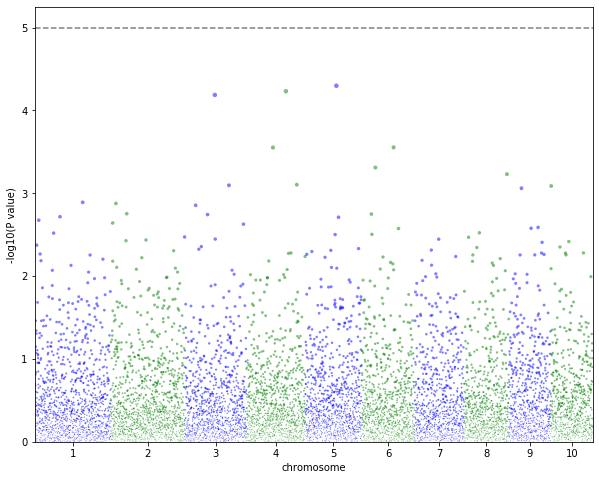

lambda=0.9866


C:\Users\Carl\Anaconda2\envs\py3\lib\site-packages\numpy\lib\scimath.py:122: RuntimeWarning: invalid value encountered in less
  if any(isreal(x) & (x < 0)):


,sid_index,SNP,Chr,GenDist,ChrPos,PValue,SnpWeight,SnpWeightSE,SnpFractVarExpl,Mixing,Nullh2
0,556,sid_5408,5.0,0.0,1.042141e+09,0.000050,0.027517,0.006787,0.008108,0.0,0.000000
1,706,sid_4504,4.0,0.0,8.680462e+08,0.000059,-0.027252,0.006782,0.008037,0.0,0.000000
2,543,sid_3231,3.0,0.0,6.226361e+08,0.000065,0.027075,0.006779,0.007988,0.0,0.000174
3,576,sid_6434,6.0,0.0,1.239995e+09,0.000279,0.024655,0.006785,0.007268,0.0,0.000000
4,474,sid_4272,4.0,0.0,8.233398e+08,0.000280,0.024639,0.006782,0.007266,0.0,0.000000
5,250,sid_6108,6.0,0.0,1.177175e+09,0.000488,0.023634,0.006778,0.006974,0.0,0.000000
6,770,sid_8465,8.0,0.0,1.631379e+09,0.000587,-0.023333,0.006788,0.006875,0.0,0.000000
7,902,sid_4700,4.0,0.0,9.058154e+08,0.000788,-0.022751,0.006777,0.006714,0.0,0.000000
8,795,sid_3483,3.0,0.0,6.711965e+08,0.000801,0.022723,0.006778,0.006705,0.0,0.000174
9,6,sid_9258,10.0,0.0,1.784156e+09,0.000816,-0.022690,0.006779,0.006694,0.0,0.000000


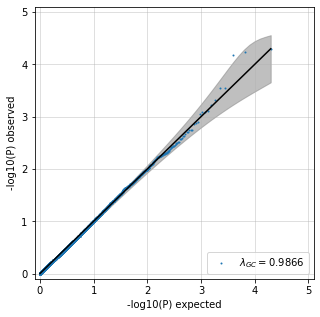

In [14]:
# manhattan plot
import pylab
import fastlmm.util.util as flutil
flutil.manhattan_plot(results_df[["Chr", "ChrPos", "PValue"]].values,pvalue_line=1e-5,xaxis_unit_bp=False)
pylab.show()

# qq plot
from fastlmm.util.stats import plotp
plotp.qqplot(results_df["PValue"].values, xlim=[0,5], ylim=[0,5])

# print head of results data frame
import pandas as pd
pd.set_option('display.width', 1000)
results_df.head(n=10)